In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Visualizacija koordinatnih sustava 

Autor: Filip Zorić 

Bilo kakve pogreške, omaške ili prijedloge poželjno je javiti na `filip.zoric@fer.hr`

Hvala puno :) 

## Osnovni 3D plot

Za potrebe ove laboratorijske vježbe vizualizirati ćemo podatke uz pomoć Pythona te programskih paketa `matplotlib` i `numpy`. 

Metoda `create_3d_plot` prima sljedeće argumente: 
 * `x_size, y_size` (int) --> željena veličina iscrtanog grafa
 * `xlim, ylim, zlim` (float) --> granice grafa koje ćemo iscrtati
Metoda vraća `ax` objekt koji koristimo dalje kako bi iscrtavali koordinatne osi koordinatnog sustava. 

U ovom prvom dijelu na jednostavan način iscrtavamo pojedine koordinatne osi koordinatnog sustavu na temelju argumenta pomaka. Tako metode `plot_?_unit_axis` iscrtavaju jediničnu os s određenim pomakom po toj osi. Dok metoda `plot_coordinate_system` iscrtava "koordinatni sustav" uzevši u obzir pomake u obziru na ishodište globalnog koordinatnog sustava. 

### Napomena: 

Navedene metode nisu u potpunosti točne jer ne uzimaju u obzir međusobni odnos osi pojedinih koordinatnog sustava. 

In [2]:
def create_3d_plot(x_size, y_size, xlim, ylim, zlim):
    
    fig = plt.figure(figsize=(x_size, y_size))
    ax = plt.axes(projection='3d')
    ax.set_xlim(-xlim, ylim); ax.set_ylim(-ylim, ylim); ax.set_zlim(-zlim, zlim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    return ax

def plot_z_unit_axis(ax, z_offset):
    
    z = np.linspace(0 + z_offset, 1 + z_offset, 10)
    x = np.zeros(len(z))
    y = np.zeros(len(z))
    
    ax.plot3D(x, y, z, 'green')
    
def plot_x_unit_axis(ax, x_offset): 
    
    x = np.linspace(0 + x_offset, 1 + x_offset, 10)
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    
    ax.plot3D(x, y, z, 'red')
    
def plot_y_unit_axis(ax, y_offset):
    
    y = np.linspace(0 + y_offset, 1 + y_offset, 10)
    x = np.zeros(len(y))
    z = np.zeros(len(y))
     
    ax.plot3D(x, y, z, 'blue')
    
    
def plot_coordinate_system(ax, x_off, y_off, z_off):
    
    plot_x_unit_axis(ax, x_off)
    plot_y_unit_axis(ax, y_off)
    plot_z_unit_axis(ax, z_off)
    


## Jedinični koordinatni sustav

Sljedeće metode omogućavaju iscrtavanje jediničnog koordinatnog sustava bez ikakvih rotacija uzevši u obzir odgovarajući vektor translacije $\mathbb{p}$. 

Metode koje se koriste su sljedeće: 
 * pomoćna metoda `get_?_axis` --> uzevši u obzir translaciju po `?` osi iscrtaj jediničnu `?` koordinatnu os na odgovarajućoj poziciji 
 * glavna metoda `plot_unit_cs` --> iscrtaj jedinični koordinatni sustav na `ax` 3D plotu. 
 
Glavna metoda `plot_unit_cs` kao argumente prima redom: 
 * `ax` --> matplotlib.plt.axes objekt koji se koristi za iscrtavanje koordinatnih osi 
 * `x_` --> pomak jediničnog koordinatnog sustava po $x$ osi globalnog koordinatnog sustava
 * `y_` --> pomak jediničnog koordinatnog sustava po $y$ osi globalnog koordinatnog sustava
 * `z_` --. pomak jediničnog koordinatnog sustava po $z$ osi globalnog koordinatnog sustava 
 
## Vektor translacije 

Vektor translacije $\mathbb{p}$ opisuje poziciju neke točke u odnosu na ishodište globalnog koordinatnog sustava. Sastoji se od 3 broja kako slijedi: 

$$
\mathbb{p} = [x, y, z]
$$

Gdje $x$ opisuje translaciju po $x$ globalnog (referentnog) koordinatnog sustava. Analogno se može zaključiti za $y$ i $z$. 

In [3]:
def get_x_axis(x_, y_, z_): 
    
    x = np.linspace(x_, x_ + 1, 10)
    y = np.ones(len(x)) * y_
    z = np.ones(len(x)) * z_
    
    return x, y, z

def get_y_axis(x_, y_, z_): 
    
    y = np.linspace(y_, y_ + 1, 10)
    x = np.ones(len(y)) * x_
    z = np.ones(len(y)) * z_
    
    return x, y, z
    
def get_z_axis(x_, y_, z_):

    z = np.linspace(z_, z_ + 1, 10)
    x = np.ones(len(z)) * x_ 
    y = np.ones(len(z)) * y_
    
    return x, y, z

def plot_unit_cs(ax, x_, y_, z_): 
    
    # X axis plot 
    x, y, z = get_x_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'red')
    x, y, z = get_y_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'blue')
    x, y, z = get_z_axis(x_, y_, z_)
    ax.plot3D(x, y, z, 'green')   
    

## Primjer iscrtavanja jediničnog koordinatnog sustava bez rotacije

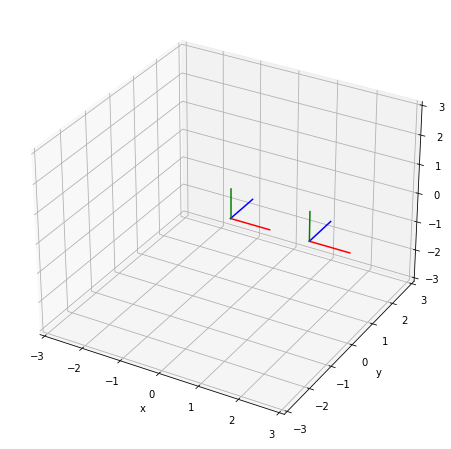

In [4]:
ax = create_3d_plot(10, 8, 3, 3, 3)
plot_unit_cs(ax, 0, 0, 0)

## Translate unit cs for 2m on x-axis
plot_unit_cs(ax, 2, 0, 0)

### Matrice rotacije 

U nastavku se nalaze metode koje generiraju matrice rotacije. 

Metoda `get_RotX` generira matricu rotacije za proizvoljni kut $\theta$ oko osi $x$. <br>
Metoda `get_RotY` generira matricu rotacije za proizvoljni kut $\theta$ oko osi $y$. <br>
Metoda `get_RotZ` generira matricu rotacije za proizvoljni kut $\theta$ oko osi $z$. <br>

Metoda `get_RotComplete` na temelju argumenata Eulerovih kuteva valjanja (engl. _roll_), poniranja (engl. _pitch_) i zakretanja (engl. _yaw_) te redoslijeda rotacija generira matricu rotacije željenog redoslijeda.  

#### Napomena

Numpy metode `np.sin` i `np.cos` rade sa radijanima pa je poželjno prije poziva metode pretvoriti željeni kut u radijane. Za navedeno je dostupna metoda `np.radians` koja omogućava jednostavno pretvaranje kuta u radijane na sljedeći način: 

`ang_rad = np.radians(ang_deg)`

In [5]:
def get_RotX(angle): 
    
    RX = np.array([[1, 0, 0], 
                   [0, np.cos(angle), -np.sin(angle)], 
                   [0, np.sin(angle), np.cos(angle)]])
    
    return RX

def get_RotY(angle): 
    
    RY = np.array([[np.cos(angle), 0, np.sin(angle)], 
                   [0, 1, 0], 
                   [-np.sin(angle), 0, np.cos(angle)]])
    return RY
    
def get_RotZ(angle): 
    
    RZ = np.array([[np.cos(angle), -np.sin(angle), 0],
                   [np.sin(angle), np.cos(angle), 0], 
                   [ 0, 0, 1]] )
    
    return RZ

def getRotComplete(angX, angY, angZ, order='XYZ'): 
    
    condition = angX > abs(3.14) or angY > abs(3.14) or angZ > abs(3.14)
    if condition: 
        warnings.warn("Absolute angle value > 3.14, assuming they are in degrees. Transforming to radians!")
        angX = np.radians(angX); angY = np.radians(angY); angZ = np.radians(angZ)
    
    RX = get_RotX(angX)
    RY = get_RotY(angY)
    RZ = get_RotZ(angZ)
    
    R_ = {'X': RX, 'Y': RY, 'Z': RZ}
    
    R = np.eye(3, 3)
    
    for i in list(order):
        R = np.matmul(R, R_[i])
    
    return R
    


## TODO: 

- osmisli zadatke za generiranje rotacijskih matrica bla bla bla


## Iscrtavanje jediničnog koordinatnog sustava 

Pomoćne metode koje se koriste za rotiranje jediničnog koordinatnog sustava su: 
 * `rotate_axis` --> Metoda koja rotira jediničnu koordinatnu os
 * `plot_cs` --> Metoda koja iscrtava jedinični koordinatni sustav uzevši u obzir rotaciju i translaciju
 
Koristeći metodu `rotate_axis` koja prima argumente:
 * `R (np.array)` --> matrica rotacije $\in \mathbb{R}^{3\times3}$
 * `axis (tuple)` --> skup vektora koji opisuju jediničnu os dobivenu `get_?_axis` metodom. 
 
 
Glavna metoda `plot_cs` iscrtava jedinični koordinatni sustav uzevši u obzir matricu rotacije $R$ te vektor translacije $\mathbb{p}$ te prima sljedeće argumente: 
 * `ax` --> isto kao i kod metode `plot_unit_cs`
 * `R (np.array)` --> matrica rotacije 
 * `p` --> vektor translacije 
 * `label` --> ime koordinatnog sustava
 
## TODO: 
- Napisati dodatak za homogenu matricu transformacije
 

In [6]:
def rotate_axis(R, axis): 
    
    x, y, z = axis[0], axis[1], axis[2]
    
    # Rotate x axis with R rotation matrix
    for i, (xi, yi, zi) in enumerate(zip (x, y, z)): 
        p_ = np.array([xi, yi, zi])
        p_ = np.matmul(R, p_)
    
        x[i], y[i], z[i] = p_[0], p_[1], p_[2]
        
    return x, y, z

def plot_cs(ax, R, p, label='L0'): 
    
    x_, y_, z_ = p[0], p[1], p[2]
    
    # X axis plot 
    x, y, z = rotate_axis(R, get_x_axis(x_, y_, z_))
    ax.plot3D(x, y, z, 'red')
    # Y axis plot
    x, y, z = rotate_axis(R, get_y_axis(x_, y_, z_))
    ax.plot3D(x, y, z, 'blue')
    # Z axis plot
    x, y, z = rotate_axis(R, get_z_axis(x_, y_, z_))
    ax.plot3D(x, y, z, 'green')
    
    ax.text(x[0], y[0], z[0]-0.3, label)
    
    #ax.text
    

def plotT(ax, T, label='L1'): 
    
    R = T[0:3, 0:3]
    p = T[0:3, 3]
    plot_cs(ax, R, p, label)

## Primjer 

/tmp/ipykernel_318321/4008212600.py:28: UserWarning: Absolute angle value > 3.14, assuming they are in degrees. Transforming to radians!
  warnings.warn("Absolute angle value > 3.14, assuming they are in degrees. Transforming to radians!")


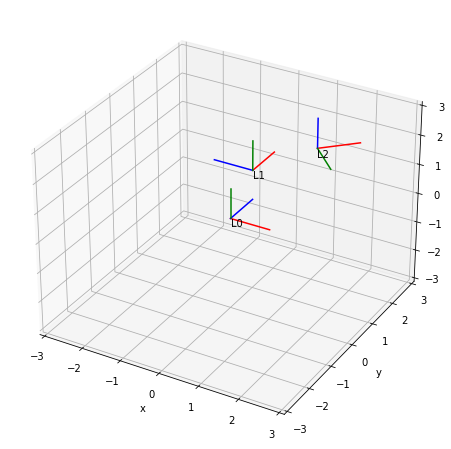

In [7]:
ax = create_3d_plot(10, 8, 3, 3, 3)

# L0
R = getRotComplete(0, 0, 0, 'XYZ')
plot_cs(ax, R, [0, 0, 0], 'L0')

# L1
R = getRotComplete(0, 0, 90, 'XYZ')
plot_cs(ax, R, [1, 0, 1], 'L1')

# L2 
R = getRotComplete(90, 45, 0, 'XYZ')
plot_cs(ax, R, [2, 2, 0], 'L2')

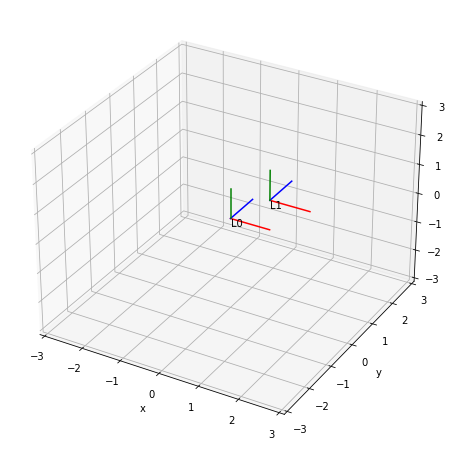

In [8]:
ax = create_3d_plot(10, 8, 3, 3, 3)

# L0
T0 = np.array([[1, 0, 0, 0], 
               [0, 1, 0, 0], 
               [0, 0, 1, 0], 
               [0, 0, 0, 1]])

T1 = np.array([[1, 0, 0, 1], 
               [0, 1, 0, 0], 
               [0, 0, 1, 1], 
               [0, 0, 0, 0]])
plotT(ax, T0, 'L0')
# L1 
plotT(ax, T1, 'L1')



## Željena poboljšanja: 

- [ ] Interaktivni grafovi kao sto je pokazano u ovom [linku](https://stackoverflow.com/questions/38364435/python-matplotlib-make-3d-plot-interactive-in-jupyter-notebook) 
- [ ] Interaktivni matplotlib [backend](https://matplotlib.org/stable/users/explain/backends.html)
- [ ] Metode za mnozenje i invertiranje homogenih transformacijskih matrica 
- [ ] Mozda napraviti neki simple GUI --> provjeriti da li postoji
- [ ] Napraviti conda virtual environment za to sve osposobiti i da radi iz prve


## Denavit-Hartenberg Direktna Kinematika

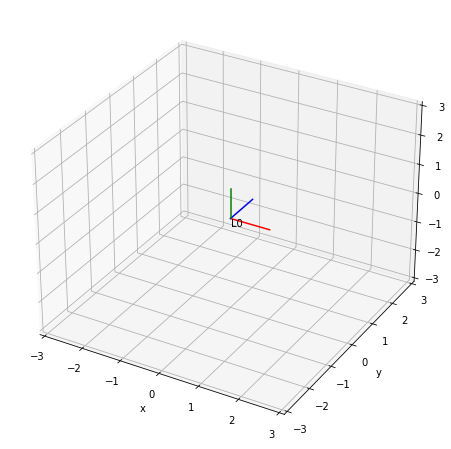

In [9]:
ax = create_3d_plot(10, 8, 3, 3, 3)

T0 = np.array([[1, 0, 0, 0], 
               [0, 1, 0, 0], 
               [0, 0, 1, 0], 
               [0, 0, 0, 1]])

plotT(ax, T0, 'L0')

In [10]:
def getDHMatrix(a, alpha, d, theta):
    
    if theta > abs(3.14): 
        
        theta = np.radians(theta)
        
    if alpha > abs(3.14): 
        
        alpha = np.radians(alpha)
    
    T = np.array([[np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a * np.cos(theta)],
                  [np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a * np.sin(theta)], 
                  [0, np.sin(alpha), np.cos(alpha), d], 
                  [0, 0, 0, 1]])
    
    return T
    

![DH Matrix](./imgs/dhNotation.png)


In [11]:
def getDK(q1, q2, q3, extract = None):
    
    T01 = getDHMatrix(0, -np.pi/2, 0.06, 0 + q1)
    T12 = getDHMatrix(0, -np.pi/2, 0.19, -np.pi/2 + q2)
    T23 = getDHMatrix(0, -np.pi/2, 0.25, 0 + q3) 
    
    Tfinal = np.matmul(np.matmul(T01, T12), T23)
    
    print(Tfinal)
    
    p = Tfinal[:3, 3]
    R = Tfinal[:2, :2]
    
    if extract == 'position': 
        return p
    elif extract == 'rotation': 
        return R
    else:
        return Tfinal
        

In [12]:
T1 = getDK(0, 0.0, 0.0)

[[ 6.1232340e-17 -1.0000000e+00  1.2246468e-16  2.5000000e-01]
 [-6.1232340e-17 -1.2246468e-16 -1.0000000e+00  1.9000000e-01]
 [ 1.0000000e+00  6.1232340e-17 -6.1232340e-17  6.0000000e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


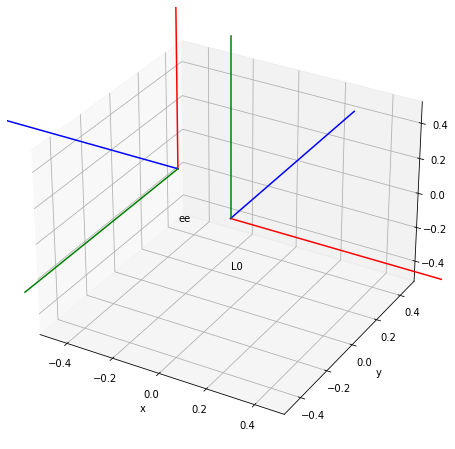

In [13]:
ax = create_3d_plot(10, 8, 0.5, 0.5, 0.5)

T0 = np.array([[1, 0, 0, 0], 
               [0, 1, 0, 0], 
               [0, 0, 1, 0], 
               [0, 0, 0, 1]])

plotT(ax, T0, 'L0')
plotT(ax, T1, 'ee')

In [14]:
def getFK(q1, q2, q3, q4, L1): 
    
    R01 = get_RotY(q1)
    R12 = get_RotX(q2)
    R23 = get_RotZ(q3)
    R34 = get_RotY(q4)
    
    T01 = np.hstack((R01, np.array([[0], [0], [0]])))
    T01 = np.vstack((T01, np.array([0, 0, 0, 1])))
    
    T12 = np.hstack((R12, np.array([[0], [0], [0]])))
    T12 = np.vstack((T12, np.array([0, 0, 0, 1])))
    
    T23 = np.hstack((R23, np.array([[0], [0], [-L1]])))
    T23 = np.vstack((T23, np.array([0, 0, 0, 1])))
                    
    T34 = np.hstack((R34, np.array([[0], [0], [0]])))
    T34 = np.vstack((T34, np.array([0, 0, 0, 1])))
    
    T_ = [T01, T12, T23, T34]
                    
    for i, T in enumerate(T_):
        print(i)
        if i == 0: 
            T1 = T
        elif i == 1: 
            TT = np.matmul(T, T1)
        else:
            TT_ = np.matmul(T, TT)
                    
    return TT_
            
    
    

In [15]:
T01 = getDHMatrix(a=0, alpha=-np.pi/2, d=1, theta=np.pi)
T12 = getDHMatrix(a=0, alpha=-np.pi/2, d=0, theta=-np.pi/2)
T23 = getDHMatrix(a=0, alpha=np.pi/2, d=1, theta=np.pi/2)
T34 = getDHMatrix(a=0, alpha=-np.pi/2, d=0, theta=0)
T45 = getDHMatrix(a=0, alpha=0, d=1, theta=-np.pi/2)

In [16]:
Tlist = [T01, T12, T23, T34, T45]

def multiply_all(Tlist):
    
    for i, T_ in enumerate(Tlist): 
        try:
            if i==0: 
                T = np.matmul(T_, Tlist[i+1])
            else: 
                T = np.matmul(T, Tlist[i+1])
        except Exception as e: 
            print(e)
                
    return T

In [17]:
Ta = multiply_all(Tlist)

list index out of range


{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda32d1d30>,
 (0, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda25baca0>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda25bafa0>,
 (0, 1, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda25b3460>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda25b3820>,
 (0, 2, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda25b3be0>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda25b3fa0>,
 (0, 3, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda25953a0>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda2595760>,
 (0, 4, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda260bd60>,
 (1, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda2595e80>,
 (1, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda2940280>,
 (1, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda2940640>,

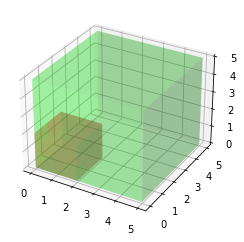

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import timeit

# https://matplotlib.org/stable/gallery/mplot3d/voxels.html

# Create axis
axes = [2, 2, 2] 
axes2 = [5, 5, 5]


# Create Data
data1 = np.ones(axes, dtype=np.bool)
data2 = np.ones(axes2, dtype=np.bool)


# Control Transparency
alpha = 0.2

# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
colors2 = np.empty(axes2 + [4], dtype=np.float)

colors[:] = [1, 0, 0, alpha]  # red
colors2[:] = [0, 1, 0, alpha]

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(data1, facecolors=colors)
ax.voxels(data2, facecolors=colors2)

# Voxels is used to customizations of the
# sizes, positions and colors.



              
#def plotBall(origin, radius): 
    
    
    


[[[ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]]

 [[ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True

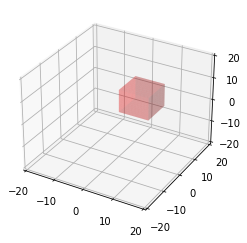

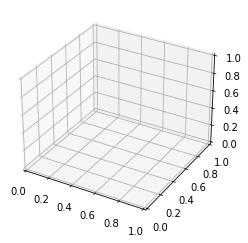

In [69]:


u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))


fig = plt.figure()
ax = plt.axes(projection='3d')




{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda3501310>,
 (0, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda37778e0>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda3777ca0>,
 (0, 1, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda3777fa0>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda3753340>,
 (0, 2, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda3753700>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda3753ac0>,
 (0, 3, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda3753e80>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda39797f0>,
 (0, 4, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda35bc5e0>,
 (1, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda3974670>,
 (1, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda35bcc70>,
 (1, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcda35bcf70>,

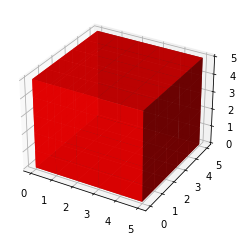

In [67]:
# Create axis
axes = [5, 5, 5]
# Create Data
data = np.ones(axes, dtype=np.bool)
# Control Transparency
alpha = 0.9
# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
colors[:] = [1, 0, 0, alpha]  # red
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)